<div style="text-align: center; font-size: 30pt; font-weight: bold; margin: 1em 0em 1em 0em">Homework 2</div>

$\textbf{Auteurs}$ : Adel Nabli, Myriam Laiymani

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Regression linéaire généralisée

* Nous avons $X \in \mathbb{R}^{n \times (d+1)}$ tel que $X = \begin{pmatrix} 1 & x_{11} &...& x_{1d} \\ \vdots & \vdots & & \vdots \\1 & x_{n1} &...& x_{nd} \end{pmatrix}$, le vecteur $t = \begin{pmatrix} t_1 \\ \vdots \\ t_n \end{pmatrix}$ et la fonction $f$ tel que $\forall x \in \mathbb{R}^d$, $f(x) = \omega^Tx +b$ avec $\omega \in \mathbb{R}^d$.

* Nous voulons implémenter l'algorithme de $\textit{batch gradient descent}$ pour la régression linéaire régularisée

$\textbf{ALGORITHME :}$

* Demande de la valeur d'un $\epsilon$ et l'hyperparamètre $\eta$ à l'utilisateur

* Initialisation aléatoire du vecteur $\theta^{(0)} = \begin{pmatrix} b^{(0)} \\ \omega^{(0)} \end{pmatrix}$

* Calcul de $\nabla_{\theta}^{(0)} = 2 X^T(X \theta^{(0)} - t)+ 2 \lambda \begin{pmatrix} 0 \\ \omega^{(0)} \end{pmatrix}$


* $\textbf{Tant que $|| \nabla_{\theta} || > \epsilon$ faire:}$

$\hspace{2cm} - Calcul \; de \; \theta^{(k+1)} = \theta^{(k)} - \eta \nabla_{\theta}^{(k)}$


$\hspace{2cm} - Calcul \; de \;  \nabla_{\theta}^{(k+1)} = 2 X^T(X \theta^{(k+1)} - t)+ 2 \lambda \begin{pmatrix} 0 \\ \omega^{(k+1)} \end{pmatrix}$

* Retourne le dernier $\theta$ calculé

### Question 1:

In [2]:
def regression_gradient(X, t, eta, epsilon, lmbda, compteur):
    
    """Use the batch-gradient descent algorithm to compute the parameters of a linear regression"""
    
    # On initialise aléatoirement theta_0 suivant une loi normale centrée réduite
    
    d = np.shape(X)[1]
    theta = np.random.normal(0, 1, d)
    
    # On crée le vecteur (0 w) 
    
    w = theta.copy()
    w[0] = 0
    
    # On initialise le gradient et le compteur
    
    grad = 2*X.T.dot(X.dot(theta)-t) + 2*lmbda*w
    cpt = 0
    
    while np.linalg.norm(grad)>epsilon and cpt<compteur:
        
        theta -= eta*grad
        w = theta.copy()
        w[0] = 0
        grad = 2*X.T.dot(X.dot(theta)-t) + 2*lmbda*w
        cpt += 1
    
    return(theta)

### Question 2:

Définition des fonctions $h$ et $D$ générant les données:

In [3]:
def h(x):
    return(np.sin(x) + 0.3*x -1)
    
def D(n):
    np.random.seed(42+n) # A n donné, on s'assure qu'on génère le même dataset, mais pour 2 n différents, 2 datasets différents
    X = np.random.uniform(low=-5, high=5, size=n)
    H = h(X)
    return(X, H)

### Question 3&4:

Définition de la fonction "graphique_q4" qui génère les graphiques demandés jusqu'à la question 4:

In [4]:
def graphique_q4(n, eta, epsilon, lmbda, compteur):
    
    # On génère nos données
    
    X, H = D(n)
    
    # On rajoute une colonne de 1 à notre matrice X
    
    X_regression = np.concatenate((np.ones((len(X),1)), np.reshape(X, (len(X),1))), axis=1)
    
    # On génère les points de notre courbe h pour pouvoir la tracer
    
    x_h = np.linspace(-10, 10, 500)
    y_h = h(x_h)
    
    # On trace le graphique
    
    fig = plt.figure (figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.scatter(X, H, color='b', marker='o', label='D('+ str(n)+ ')')
    ax.plot(x_h, y_h, color='r', label = 'Courbe de h')
    
    for l in lmbda:
        
        # On applique la descente de gradient pour trouver theta
        
        theta = regression_gradient(X_regression, H, eta, epsilon, l, compteur)
        
        # On génère des points de notre droite de régression pour pouvoir la tracer
        
        x_reg = np.concatenate((np.ones((5,1)),  np.reshape(np.linspace(-10, 10, 5), (5,1))), axis=1)
        y_reg = x_reg.dot(theta)
        
        # On trace la droite de régression
        
        rgb = tuple(np.random.uniform(0,1,3))
        ax.plot(x_reg[:,1], y_reg, color = rgb, label = 'Regression linéaire, $\lambda$= '+str(l))
    
    plt.title('Régressions linéaires sur des données générées par h')
    ax.legend()
    plt.show()

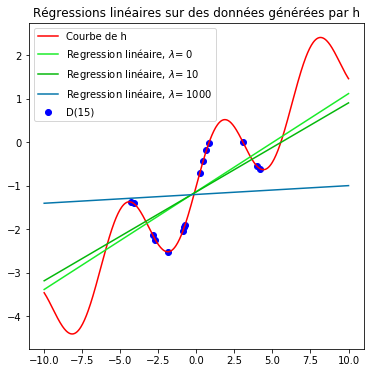

In [5]:
graphique_q4(n = 15, eta = 0.0003, epsilon = 0.0001, lmbda = [0, 10, 1000], compteur = 1000)

### Question 5:

* Nous savons que l'erreur quadratique moyenne se calcule avec la formule $\hat{R} =\dfrac{1}{n}\sum_{i=1}^n (\omega^T x_i + b - t_i)^2$

* Nous sommes ici en dimension $d=1$

* Nous allons définir une fonction "graphique_q5" qui génère le graphique demandé en question 5:

In [6]:
def graphique_q5(n_train, n_test, eta, epsilon, lmbda, compteur):
    
    # On génère nos données
    
    X_train, H_train = D(n_train)
    X_test, H_test = D(n_test)
    
    # On rajoute une colonne de 1 à nos matrices X
    
    X_train = np.concatenate((np.ones((len(X_train),1)), np.reshape(X_train, (len(X_train),1))), axis=1)
    X_test = np.concatenate((np.ones((len(X_test),1)), np.reshape(X_test, (len(X_test),1))), axis=1)
    
    # On crée le vecteur error qui contient les différentes erreurs quadratiques moyennes pour les différents lambdas
    
    error = np.zeros(len(lmbda))
    
    for k in range(len(lmbda)):
        
        # On applique la descente de gradient pour trouver theta
        
        theta = regression_gradient(X_train, H_train, eta, epsilon, lmbda[k], compteur)
        error[k] = np.mean((X_test.dot(theta) - H_test)**2)
    
    plt.plot(lmbda, error)
    plt.xscale('log')
    plt.xlabel('$\lambda$ (échelle log)')
    plt.ylabel('Erreur quadratique moyenne')
    plt.title('Erreurs quadratiques moyennes des différentes régressions linéaires en fonction de $\lambda$')
    plt.show()

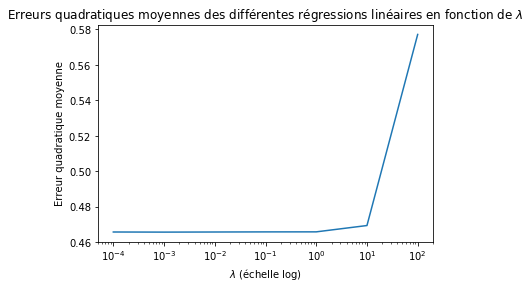

In [7]:
graphique_q5(n_train = 15, n_test = 100, eta = 0.0003, epsilon = 0.0001, lmbda = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], compteur = 1000)

## Régression avec un pré-traitement non-linéaire fixe



* En posant $\omega \in \mathbb{R}^l$ et $b \in \mathbb{R}$, on a,  $\forall x \in \mathbb{R}, \; \tilde{f}(x) = f(\phi(x)) =  \omega^T \phi(x) + b  = \sum_{i=1}^l w_i x^{i} +b$

* Ainsi, nous allons travailler avec $X \in \mathbb{R}^{n \times (l+1)}$ tel que $X = \begin{pmatrix} 1 & x_1 & ...& x_1^l \\ \vdots & \vdots & & \vdots \\1 & x_{n} & ... & x_n^l \end{pmatrix}$ et le vecteur $\theta = \begin{pmatrix} b \\ \omega \end{pmatrix} , \; \theta \in \mathbb{R}^{l+1}$

* Pour calculer le $\textbf{vrai risque}$ et le $\textbf{risque empirique}$, nous utiliserons la formule de l'erreur quadratique moyenne définie à la question 5.

### Question 6:

* Afin de faire en sorte que l'algorithme du batch gradient descent converge, nous prendons des valeurs de $\eta$ qui dépendront de la puissance $l$


* L'algorithme de descente de gradient prenant beaucoup de temps à converger pour les grandes valeurs de $l$, pour $l>5$ on préférera calculer la solution analytique à $(X^T X + \lambda \mathbf{I}_{l+1}) \theta = X^Ty$ en utilisant la fonction "solve" de scipy.

In [35]:
from scipy import linalg

def graphique_q6(n_train, n_test, l, eta, epsilon, lmbda, compteur):
       
    # On génère nos données
    
    x_train, H_train = D(n_train)
    x_test, H_test = D(n_test)
    
    # On génère les points de notre courbe h pour pouvoir la tracer
    
    x_h = np.linspace(-10, 10, 300)
    y_h = h(x_h)
    
    # On trace le graphique
    
    fig = plt.figure (figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.scatter(x_train, H_train, color='b', marker='o', label='D('+ str(n_train)+ ')')
    ax.plot(x_h, y_h, color='r', label = 'Courbe de h')
    
    # On génère la matrice X définie ci-dessus
    
    x_Train = np.reshape(x_train, (len(x_train),1))
    x_Test = np.reshape(x_test, (len(x_test),1))
    x_H = np.reshape(x_h, (len(x_h),1))
    
    for k in range(len(l)):
        
        X_train = np.ones((len(x_Train),1))
        X_test = np.ones((len(x_Test),1))
        X_h = np.ones((len(x_h),1))
        
        for j in range(l[k]):
            
            X_train = np.concatenate((X_train, x_Train**(j+1)), axis=1)
            X_test = np.concatenate((X_test, x_Test**(j+1)), axis=1)
            X_h = np.concatenate((X_h, x_H**(j+1)), axis=1)
            
        if l[k]>5:
            
            # Pour des raisons de temps de calcul, on préfèrera utiliser la solution analytique plutôt que la
            # descente de gradient pour les grandes puissances
            
            theta = linalg.solve(X_train.T.dot(X_train) + lmbda*np.identity(l[k]+1), X_train.T.dot(H_train))
            
        else:
            
            theta = regression_gradient(X_train, H_train, eta[k], epsilon, lmbda, compteur)
            
        risque_empirique = np.mean((X_train.dot(theta) - H_train)**2)
        risque_vrai = np.mean((X_test.dot(theta) - H_test)**2)
        
        rgb = tuple(np.random.uniform(0,1,3))
        ax.plot(x_h, X_h.dot(theta), color = rgb, label='Courbe de $f$, $l=$'+ str(l[k]) + ', $R_{empir}=$' + str(np.round(risque_empirique, 2)) + ', $R_{vrai}=$' + str(np.round(risque_vrai, 2)) )
    
    plt.title('Régressions polynomiales pour différentes puissances $l$ sur des données générées par h')
    plt.ylim(-10, 10)
    ax.legend()
    plt.show()

L:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.327576e-22


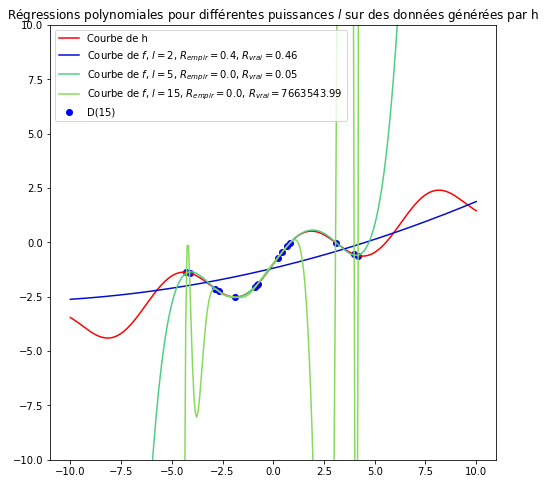

In [37]:
graphique_q6(n_train = 15, n_test = 100, l = [2, 5, 15], eta = [1e-5, 1e-7, 1e-12], epsilon = 0.01, lmbda = 0.01, compteur = 1e7)